### Importing necessary libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D,Conv2D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,recall_score,f1_score
from sklearn import metrics
#---
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

### **Importing data.** Since we are using google colab and data is in google drive so we need to allow colab to read data.

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Loading data into data frame.

In [179]:
df = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/dataset/train.csv')

In [180]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [181]:
# Current train set size.
df.shape

(7352, 563)

#### Current train data set dimensions : (7352, 563)

In [182]:
# Separate features and target
X_train = df.drop('Activity', axis=1)
y_train = df['Activity']

In [183]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [184]:
y_train.head()

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


### Loading test data set.

In [185]:
df_test = pd.read_csv('/content/drive/MyDrive/AI_ML_Project/dataset/test.csv')

In [186]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [187]:
df_test.shape

(2947, 563)

In [188]:
# Separate features and target
X_test = df_test.drop('Activity', axis=1)
y_test = df_test['Activity']

In [189]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [190]:
y_test.head()

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


## **Feature Engineering**

#### **Duplicate Features** : Different features (or columns) in a dataset that have the same or very similar values. These redundant features can lead to inefficiencies in model training and can also cause overfitting, where the model learns noise in the data rather than the underlying patterns.

In [191]:
def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [192]:
duplicate_columns = get_duplicate_columns(X_train)
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

#### Taking a look into the duplicate column values.

In [193]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
0,-0.959434,-0.959434,-0.959434,-0.959434
1,-0.979289,-0.979289,-0.979289,-0.979289
2,-0.983703,-0.983703,-0.983703,-0.983703
3,-0.986542,-0.986542,-0.986542,-0.986542
4,-0.992827,-0.992827,-0.992827,-0.992827
...,...,...,...,...
7347,-0.031719,-0.031719,-0.031719,-0.031719
7348,-0.065256,-0.065256,-0.065256,-0.065256
7349,-0.003936,-0.003936,-0.003936,-0.003936
7350,-0.002445,-0.002445,-0.002445,-0.002445


In [194]:
X_train[['tBodyAccMag-std()','tBodyAccMag-std()']]

,tBodyAccMag-std(),tBodyAccMag-std()
0,-0.950551,-0.950551
1,-0.976057,-0.976057
2,-0.988020,-0.988020
3,-0.986421,-0.986421
4,-0.991275,-0.991275
...,...,...
7347,-0.093688,-0.093688
7348,-0.148539,-0.148539
7349,-0.158701,-0.158701
7350,-0.185720,-0.185720


#### We can see that most of the data in various columns across the data set is duplicated, we can drop the redundant column.

In [195]:
for duplicate_columns_list in duplicate_columns.values():
    X_train.drop(columns=duplicate_columns_list,inplace=True)
    X_test.drop(columns=duplicate_columns_list,inplace=True)

In [196]:
print(X_train.shape)
print(X_test.shape)

(7352, 541)
(2947, 541)


#### After removing duplicate columns the data set reduced from 562 columns to 541 columns.

### **Variance Threshold** : It is used to remove features with low variance, which means they do not vary much and thus do not provide useful information for explaining the variation in the output.This method is applied to two types of features:
 - Constant Features: These are features where all values are the same.
 - Quasi-Constant Features: These features have the same value for the vast majority of rows (e.g., 995 out of 1000 rows have the same value), with only a few different values.

In [197]:
sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [198]:
sel.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

In [199]:
columns = X_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=350)

In [200]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [201]:
print(X_train.shape)
print(X_test.shape)

(7352, 350)
(2947, 350)


In [202]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0
1,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0
2,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0
3,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0
4,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0


### **Pearson Correlation** in Removing Multicollinearity

<Axes: >

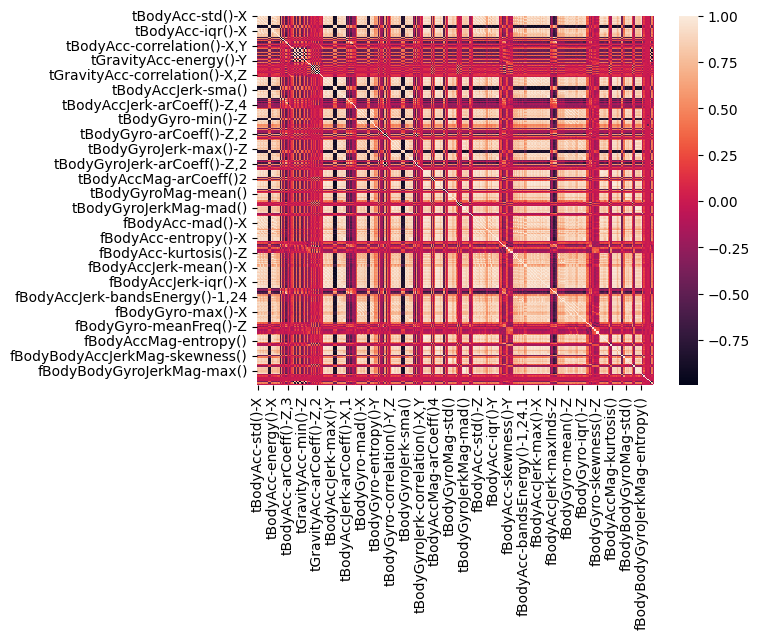

In [203]:
sns.heatmap(X_train.corr())

In [204]:
corr_matrix = X_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-std()-X,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,0.895217,0.844993,-0.966500,...,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345
tBodyAcc-std()-Y,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,0.953573,0.884490,-0.937918,...,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524
tBodyAcc-std()-Z,0.851668,0.895510,1.000000,0.844469,0.891441,0.997418,0.853884,0.866820,0.937802,-0.860691,...,0.157792,0.126701,-0.006769,-0.020036,-0.018429,-0.006471,-0.345011,0.476006,0.482828,-0.050123
tBodyAcc-mad()-X,0.998632,0.922803,0.844469,1.000000,0.916106,0.839267,0.973216,0.889934,0.838920,-0.962235,...,0.149257,0.117804,-0.042713,-0.021537,0.019389,-0.024951,-0.368191,0.466424,0.390922,-0.063440
tBodyAcc-mad()-Y,0.920888,0.997347,0.891441,0.916106,1.000000,0.891178,0.910411,0.949550,0.879898,-0.933135,...,0.200890,0.172809,-0.023722,-0.012310,-0.012546,-0.012341,-0.377025,0.525081,0.431459,-0.114753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,-0.000297,-0.001207,0.017876,...,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656,0.009340
"angle(X,gravityMean)",-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,-0.372172,-0.346824,0.362847,...,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137
"angle(Y,gravityMean)",0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,0.490324,0.463763,-0.470812,...,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829
"angle(Z,gravityMean)",0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,0.427291,0.419728,-0.393206,...,0.057831,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712


In [205]:
def get_correlated_columns(corr_matrix):
  # Get the column names of the DataFrame
  columns = corr_matrix.columns

  # Create an empty list to keep track of columns to drop
  columns_to_drop = []

  # Loop over the columns
  for i in range(len(columns)):
      for j in range(i + 1, len(columns)):
          # Access the cell of the DataFrame
          if corr_matrix.loc[columns[i], columns[j]] > 0.95:
              columns_to_drop.append(columns[j])

  return columns_to_drop

In [206]:
columns_to_drop = get_correlated_columns(corr_matrix)
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

197

In [207]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [208]:
print(X_train.shape)
print(X_test.shape)

(7352, 153)
(2947, 153)


### **ANOVA Test**

In [209]:
sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [210]:
columns = X_train.columns[sel.get_support()]

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

# Sample file
X_test.to_csv('output.csv', index=False)

In [211]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.995279,-0.983111,-0.913526,-0.744413,0.852947,0.685845,0.814263,-0.407747,-0.679338,-0.602122,...,0.547151,-0.999454,-0.793103,-0.988175,0.346989,-0.516080,-0.128989,-0.841247,0.179941,-0.058627
1,-0.998245,-0.975300,-0.960322,-0.818409,0.849308,0.685845,0.822637,-0.714892,-0.500930,-0.570979,...,-0.068178,-0.999856,-1.000000,-0.989549,0.532061,-0.624871,-0.271958,-0.844788,0.180289,-0.054317
2,-0.995380,-0.967187,-0.978944,-0.818409,0.843609,0.682401,0.839344,-0.592235,-0.485821,-0.570979,...,-0.110720,-0.999954,-0.862069,-0.999890,0.660795,-0.724697,-0.212728,-0.848933,0.180637,-0.049118
3,-0.996091,-0.983403,-0.990675,-0.829711,0.843609,0.682401,0.837869,-0.627446,-0.850930,-0.911872,...,-0.049728,-0.999931,-1.000000,-0.995562,0.678921,-0.701131,-0.035684,-0.848649,0.181935,-0.047663
4,-0.998139,-0.980817,-0.990482,-0.824705,0.849095,0.683250,0.837869,-0.786553,-0.559477,-0.761434,...,-0.162230,-0.999926,-1.000000,-0.982177,0.559058,-0.528901,-0.273582,-0.847865,0.185151,-0.043892


### Eventually after feature engineering the total feature is reduced from 563 to 100.

#### Columns that are considered for model building

In [212]:
index=0
for column in X_train.columns:
  print(index,' - ',column)
  index+=1

0  -  tBodyAcc-std()-X
1  -  tBodyAcc-std()-Y
2  -  tBodyAcc-std()-Z
3  -  tBodyAcc-max()-Z
4  -  tBodyAcc-min()-X
5  -  tBodyAcc-min()-Y
6  -  tBodyAcc-min()-Z
7  -  tBodyAcc-entropy()-X
8  -  tBodyAcc-entropy()-Y
9  -  tBodyAcc-entropy()-Z
10  -  tBodyAcc-arCoeff()-X,1
11  -  tBodyAcc-arCoeff()-X,2
12  -  tBodyAcc-arCoeff()-X,3
13  -  tBodyAcc-arCoeff()-Y,1
14  -  tBodyAcc-arCoeff()-Z,1
15  -  tBodyAcc-correlation()-X,Y
16  -  tBodyAcc-correlation()-Y,Z
17  -  tGravityAcc-mean()-X
18  -  tGravityAcc-mean()-Y
19  -  tGravityAcc-mean()-Z
20  -  tGravityAcc-sma()
21  -  tGravityAcc-energy()-Y
22  -  tGravityAcc-energy()-Z
23  -  tGravityAcc-entropy()-X
24  -  tGravityAcc-entropy()-Y
25  -  tGravityAcc-arCoeff()-Y,1
26  -  tGravityAcc-arCoeff()-Y,2
27  -  tGravityAcc-arCoeff()-Z,1
28  -  tGravityAcc-arCoeff()-Z,2
29  -  tGravityAcc-correlation()-Y,Z
30  -  tBodyAccJerk-std()-Z
31  -  tBodyAccJerk-min()-X
32  -  tBodyAccJerk-min()-Y
33  -  tBodyAccJerk-min()-Z
34  -  tBodyAccJerk-entropy(

## **Building models** using above features.

In [213]:
Y_train= y_train
Y_test= y_test

In [214]:
#le = LabelEncoder()
#le.fit(y_train)
#y_train = le.transform(y_train)
#y_test = le.transform(y_test)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
X_test_reg = X_test

activites = y_train.unique()

class_map = {i : val for i, val in enumerate(activites)}
class_map_reverse = {key : val for val, key in class_map.items()}

print(class_map)


{0: 'STANDING', 1: 'SITTING', 2: 'LAYING', 3: 'WALKING', 4: 'WALKING_DOWNSTAIRS', 5: 'WALKING_UPSTAIRS'}


### Logistic Regression

In [215]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy:", accuracy)

Test accuracy: 0.9409569053274517


In [216]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.89      0.90       491
          STANDING       0.90      0.91      0.91       532
           WALKING       0.92      0.97      0.94       496
WALKING_DOWNSTAIRS       0.95      0.96      0.96       420
  WALKING_UPSTAIRS       0.97      0.91      0.94       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [217]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
Actual,,,,,,,
LAYING,535,0,2,0,0,0,537
SITTING,0,438,50,0,0,3,491
STANDING,0,47,484,0,0,1,532
WALKING,0,0,0,481,10,5,496
WALKING_DOWNSTAIRS,0,0,0,10,405,5,420
WALKING_UPSTAIRS,0,0,0,31,10,430,471
All,535,485,536,522,425,444,2947


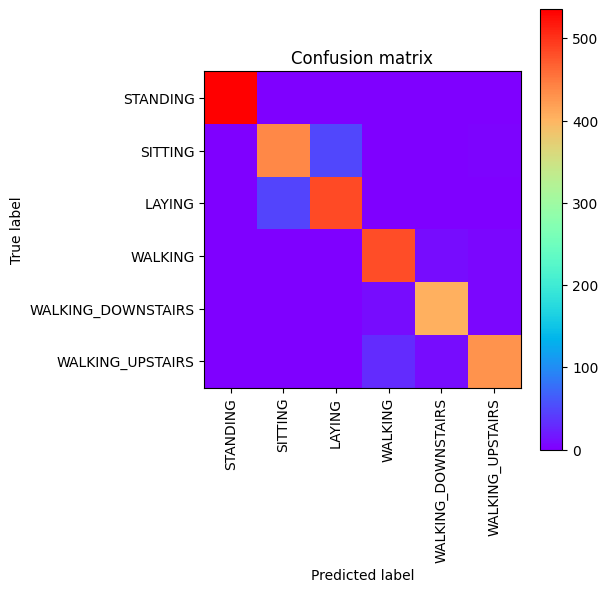

In [218]:

width = 6
height = 6
n_classes = 6
# Output classes to learn how to classify
LABELS = class_map.values()
plt.figure(figsize=(width, height))
plt.imshow(
    confusion_matrix(y_test,y_pred),
    interpolation='nearest',
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

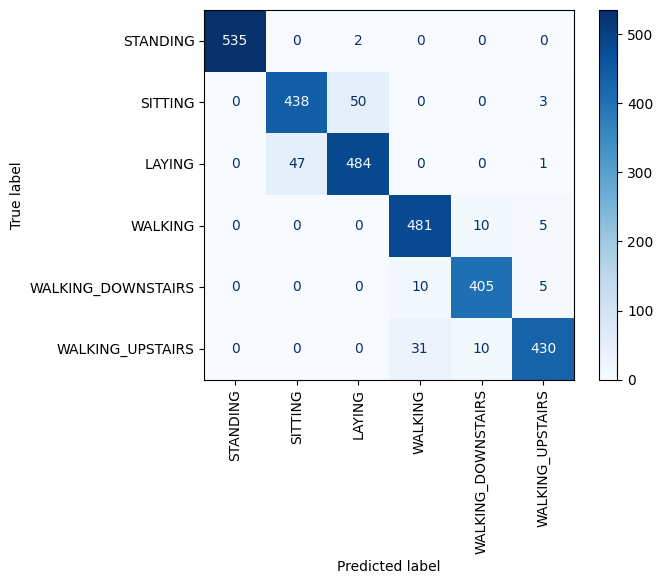

In [219]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.show()

In [220]:
model_accuracy_dict = [{"Model": "Logistic Regression", "Accuracy":accuracy}]

**Feedforward Neural Network Model Buidling**

In [221]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)


activites = pd.Series(y_train).unique()

class_map = {i : val for i, val in enumerate(activites)}
class_map_reverse = {key : val for val, key in class_map.items()}

print(class_map)
X_test_feed = X_test

{0: 'STANDING', 1: 'SITTING', 2: 'LAYING', 3: 'WALKING', 4: 'WALKING_DOWNSTAIRS', 5: 'WALKING_UPSTAIRS'}


In [222]:
y_train = y_train.apply(lambda x : class_map_reverse[x])
y_test = y_test.apply(lambda x : class_map_reverse[x])

In [223]:
model = Sequential()
model.add(Dense(units=128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=(len(np.unique(y_train))), activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,462 (91.65 KB)

 Trainable params: 23,462 (91.65 KB)

 Non-trainable params: 0 (0.00 B)

In [224]:
model.compile(optimizer = Adam(learning_rate=0.001),loss = SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

In [225]:
his = model.fit(X_train, y_train, batch_size = 64, epochs= 10, validation_data = (X_test,y_test))

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9753 - sparse_categorical_accuracy: 0.6014 - val_loss: 0.2463 - val_sparse_categorical_accuracy: 0.9053
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2531 - sparse_categorical_accuracy: 0.9041 - val_loss: 0.1996 - val_sparse_categorical_accuracy: 0.9206
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9423 - val_loss: 0.1912 - val_sparse_categorical_accuracy: 0.9240
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1433 - sparse_categorical_accuracy: 0.9454 - val_loss: 0.2172 - val_sparse_categorical_accuracy: 0.9192
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9599 - val_loss: 0.1907 - val_sparse_categorical_accuracy: 0.9260
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9633 - val_loss: 0.1939 - val_sparse_categorical_accuracy: 0.9304
Epoc

In [226]:
model_history = his.history.keys()
model_history

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

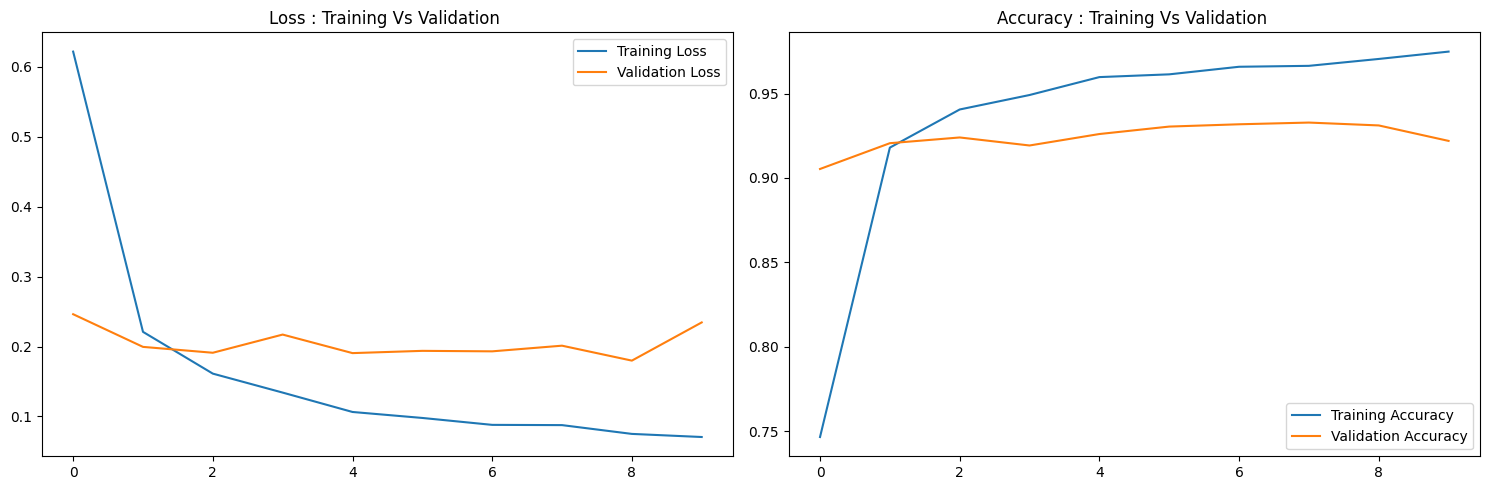

In [227]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(10), (his.history['loss']), label='Training Loss')
plt.plot(range(10), (his.history['val_loss']), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss : Training Vs Validation ')

plt.subplot(1, 2, 2)
plt.plot(range(10), (his.history['sparse_categorical_accuracy']), label='Training Accuracy')
plt.plot(range(10), (his.history['val_sparse_categorical_accuracy']), label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training Vs Validation ')

plt.tight_layout()
plt.show()

In [228]:
callback = EarlyStopping(monitor = 'val_loss',
#                          min_delta = 0.005
                         patience = 10
                        )
his_2 = model.fit(X_train, y_train, batch_size = 128, epochs= 500, callbacks=callback,validation_data = (X_test, y_test))

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0708 - sparse_categorical_accuracy: 0.9751 - val_loss: 0.1731 - val_sparse_categorical_accuracy: 0.9389
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.2077 - val_sparse_categorical_accuracy: 0.9335
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.1841 - val_sparse_categorical_accuracy: 0.9359
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0536 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.1846 - val_sparse_categorical_accuracy: 0.9389
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.1926 - val_sparse_categorical_accuracy: 0.9389
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9796 - val_loss: 0.1767 - val_sparse_categorical_accuracy: 0.9393
Epoch 7/50

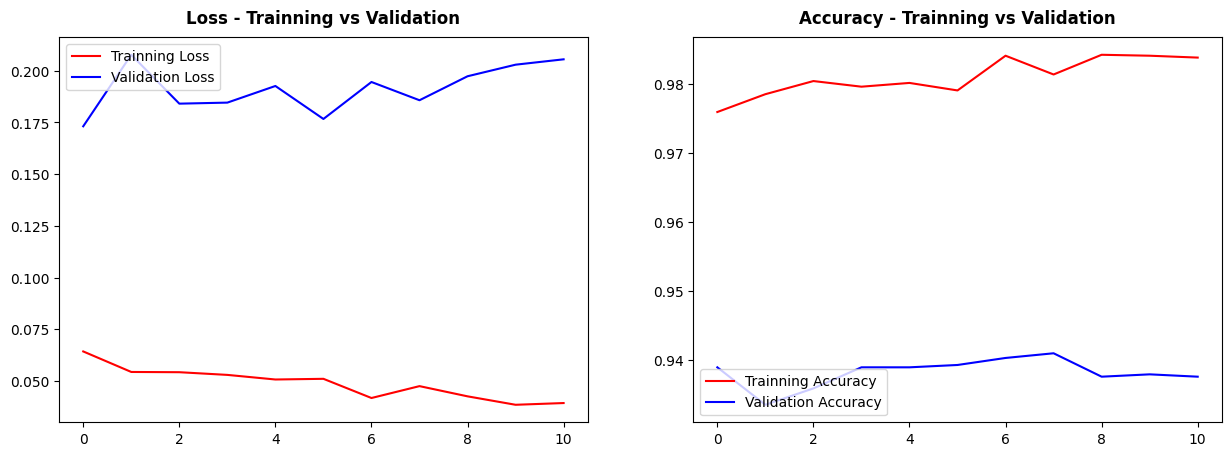

In [229]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(0, len(his_2.history['loss'])), his_2.history['loss'], label='Trainning Loss', color='red')
plt.plot(range(0, len(his_2.history['loss'])), his_2.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Loss - Trainning vs Validation', pad=10, fontsize=12, fontweight='bold')
plt.legend(loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(range(0, len(his_2.history['loss'])), his_2.history['sparse_categorical_accuracy'], label='Trainning Accuracy', color='red')
plt.plot(range(0, len(his_2.history['loss'])), his_2.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Accuracy - Trainning vs Validation', pad=10, fontsize=12, fontweight='bold')
plt.legend(loc = 'lower left')

plt.show()

Model **Evaluation**

In [230]:
y_test_pred = model.predict(X_test)
print(np.argmax(y_test_pred))

y_test_label_pred = np.argmax(y_test_pred, axis=1)
y_train_pred = model.predict(X_train)
y_train_label_pred = np.argmax(y_train_pred, axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
332
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [231]:
# Define a evaluation function
def classification_errors_train_test(y_train, y_train_pred, y_test, y_test_pred):

    errors = {}

    # Train Data Metrics
    errors['Train_Accuracy'] = accuracy_score(y_train, y_train_pred)
    errors['Train_Precision'] = precision_score(y_train, y_train_pred, average='weighted')
    errors['Train_Recall'] = recall_score(y_train, y_train_pred, average='weighted')
    errors['Train_F1-Score'] = f1_score(y_train, y_train_pred, average='weighted')

    # Test Data Metrics
    errors['Test_Accuracy'] = accuracy_score(y_test, y_test_pred)
    errors['Test_Precision'] = precision_score(y_test, y_test_pred, average='weighted')
    errors['Test_Recall'] = recall_score(y_test, y_test_pred, average='weighted')
    errors['Test_F1-Score'] = f1_score(y_test, y_test_pred, average='weighted')

    return errors

In [232]:
classification_errors_train_test(y_train, y_train_label_pred, y_test, y_test_label_pred)

{'Train_Accuracy': 0.9921109902067464,
 'Train_Precision': 0.992118825579816,
 'Train_Recall': 0.9921109902067464,
 'Train_F1-Score': 0.9921117044270639,
 'Test_Accuracy': 0.9375636240244316,
 'Test_Precision': 0.9386745908761264,
 'Test_Recall': 0.9375636240244316,
 'Test_F1-Score': 0.9377550310677583}

In [233]:
Accuracy = accuracy_score(y_test, y_test_label_pred)

In [234]:
#model_accuracy_dict.append({"Model": "Feed forward", "Accuracy": Accuracy})
model_accuracy_dict.append({"Model": "Feed forward", "Accuracy": Accuracy})

In [235]:
conf_matrix = classification_report(y_test, y_test_label_pred)
print("\nConfusion Matrix for test data:")
print(conf_matrix)


Confusion Matrix for test data:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       532
           1       0.91      0.89      0.90       491
           2       1.00      0.96      0.98       537
           3       0.93      0.98      0.95       496
           4       0.95      0.96      0.95       420
           5       0.97      0.92      0.94       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947




Confusion Matrix:
[[489  43   0   0   0   0]
 [ 50 437   1   0   0   3]
 [ 19   0 518   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0   9 403   8]
 [  0   1   0  25  13 432]]


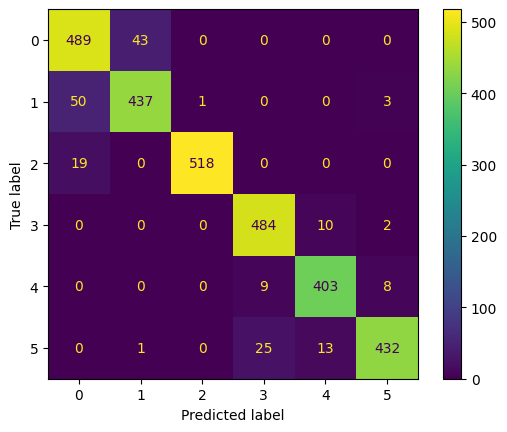

In [236]:
conf_matrix = confusion_matrix(y_test, y_test_label_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

**LSTM**

In [237]:
time_steps = 10

def create_sequences(X, y, time_steps = 5):
    X_, y_ = [], []
    n = X.shape[0]
    for i in np.arange(n - time_steps):
        X_.append(X[i:(i + time_steps)])
        y_.append(y[i + time_steps])
    return np.array(X_), np.array(y_)

#X_train_ = df_train.drop("Activity", axis = 1).values
#X_test_ = df_test.drop("Activity", axis = 1).values
#y_train_ = df_train["Activity"].values
#y_test_ = df_test["Activity"].values

X_train_ = X_train
y_train_ = y_train
X_test_  = X_test
y_test_  = y_test

X_train, y_train = create_sequences(X_train_, y_train_, time_steps)
X_test, y_test = create_sequences(X_test_, y_test_, time_steps)

print(X_train.shape, X_test.shape)

(7342, 10, 100) (2937, 10, 100)


In [238]:
#model Training

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    tf.keras.layers.LSTM(units = 256, return_sequences = True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(units = 128, return_sequences = True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(units = 64),
    tf.keras.layers.Dense(units = 32, activation = "relu"),
    tf.keras.layers.Dense(units = len(class_map), activation = "softmax")
])

model.compile(optimizer = tf.keras.optimizers.Adam(0.005), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 10, 256)             │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 10, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 10, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 614,374 (2.34 MB)

 Trainable params: 614,374 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

In [239]:
cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.3, callbacks = cb)

Epoch 1/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.6673 - loss: 0.7899 - val_accuracy: 0.8911 - val_loss: 0.4119
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9238 - loss: 0.2750 - val_accuracy: 0.9269 - val_loss: 0.2531
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9428 - loss: 0.2159 - val_accuracy: 0.9133 - val_loss: 0.2983
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9376 - loss: 0.2353 - val_accuracy: 0.9392 - val_loss: 0.2376
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9558 - loss: 0.1728 - val_accuracy: 0.9383 - val_loss: 0.2504
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.9494 - loss: 0.1908 - val_accuracy: 0.8611 - val_loss: 0.4742
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9473 - loss: 0.2000 - val_accuracy: 0.9328 - val_loss: 0.2422
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9555 - loss: 0

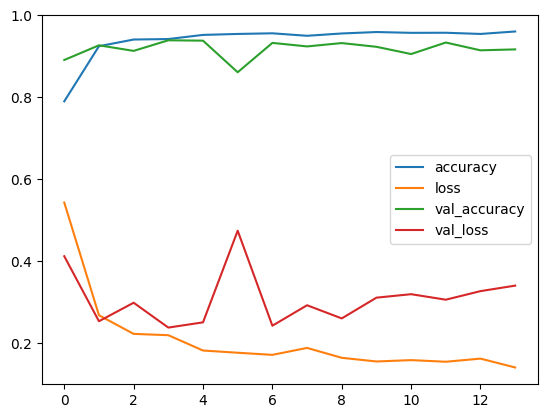

In [240]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

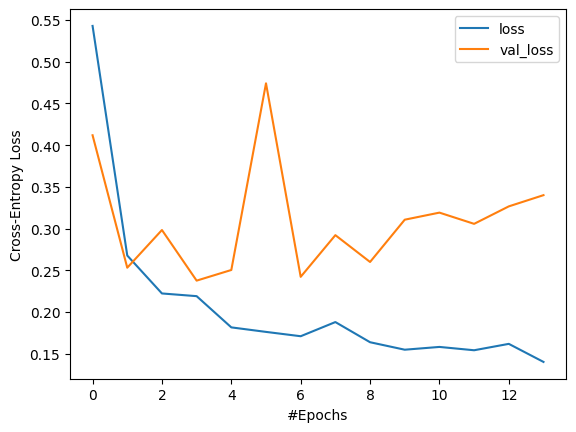

In [241]:
history_df[["loss", "val_loss"]].plot()
plt.xlabel("#Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.show()

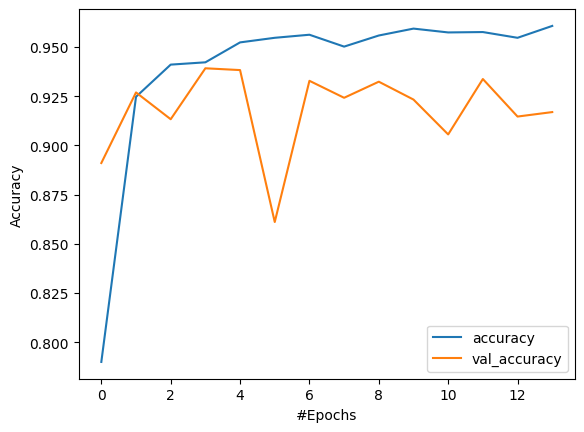

In [242]:
history_df[["accuracy", "val_accuracy"]].plot()
plt.xlabel("#Epochs")
plt.ylabel("Accuracy")
plt.show()

In [243]:
#model Evaluation
model.evaluate(X_test, y_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9154 - loss: 0.3294


[0.3319251537322998, 0.9104528427124023]

In [244]:
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.array([np.argmax(probs) for probs in y_test_pred_probs])
print(y_test_pred)

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
[0 0 0 ... 5 5 5]


In [245]:
clf_report = metrics.classification_report(y_test, y_test_pred, digits = 4)
print(clf_report)

              precision    recall  f1-score   support

           0     0.8737    0.9540    0.9121       522
           1     0.9501    0.8921    0.9202       491
           2     0.9680    0.9590    0.9635       537
           3     0.8868    0.9315    0.9086       496
           4     0.8855    0.8286    0.8561       420
           5     0.8978    0.8769    0.8872       471

    accuracy                         0.9105      2937
   macro avg     0.9103    0.9070    0.9079      2937
weighted avg     0.9115    0.9105    0.9102      2937



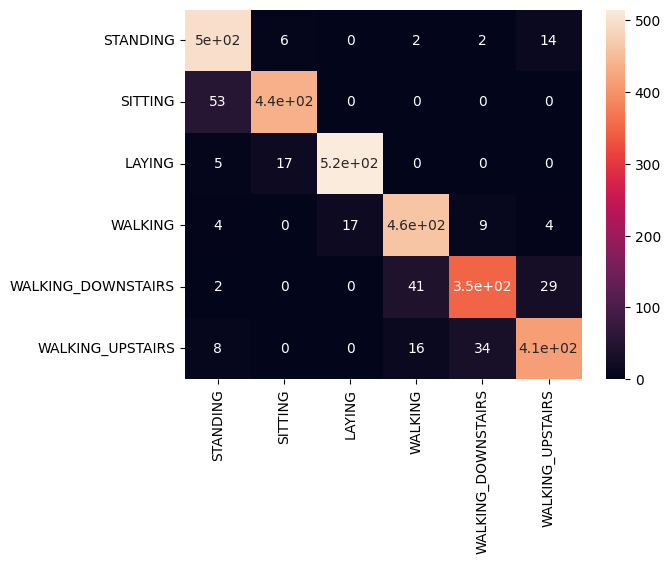

In [246]:
conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot = True, xticklabels = class_map.values(), yticklabels = class_map.values())
plt.show()

In [247]:
accuracy_score(y_test, y_test_pred)

0.9104528430371127

In [248]:
model_accuracy_dict.append({"Model": "LSTM", "Accuracy":accuracy_score(y_test, y_test_pred)})

**CNN Model**

In [249]:
# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
# Reshape features for CNN (Add channel dimension)
#X_train_reshaped = np.expand_dims(df.values, axis=-1)  # Shape: (samples, features, 1)
X_train_reshaped = np.expand_dims(X_train_, axis=-1)
# Split into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train_categorical, test_size=0.2, random_state=42 )
X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train_, test_size=0.2, random_state=42 )
# CNN Model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    #Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer])
    Dense(len(np.unique(y_train_)), activation='softmax')  # Output layer])
])

# Compile model
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Model Summary
model_cnn.summary()

# Train the CNN Model
history = model_cnn.fit(
    X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val)
)

# Evaluate on validation data
val_loss, val_acc = model_cnn.evaluate(X_val, y_val)  # Changed model to model_cnn
print(f"Validation Accuracy: {val_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 47, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         376,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 410,566 (1.57 MB)

 Trainable params: 410,566 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6130 - loss: 0.9385 - val_accuracy: 0.9082 - val_loss: 0.2416
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8938 - loss: 0.2588 - val_accuracy: 0.9483 - val_loss: 0.1330
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9452 - loss: 0.1512 - val_accuracy: 0.9579 - val_loss: 0.1160
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9511 - loss: 0.1249 - val_accuracy: 0.9545 - val_loss: 0.1202
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9601 - loss: 0.1007 - val_accuracy: 0.9646 - val_loss: 0.0951
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9698 - loss: 0.0739 - val_accuracy: 0.9646 - val_loss: 0.0870
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9720 - loss: 0.0729 - val_accuracy: 0.9660 - val_loss: 0.0892
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9736 - loss: 0.0648 - val_accuracy: 0.9680 - v

In [250]:
#model Evaluation
X_test_reshaped = X_test_.reshape(X_test_.shape[0], X_test_.shape[1], 1)
# Evaluate the model on the reshaped test data
loss, accuracy = model_cnn.evaluate(X_test_reshaped, y_test_)
print(f"Test Accuracy: {accuracy:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9350 - loss: 0.2863
Test Accuracy: 0.9389


In [251]:
y_test_pred_probs = model_cnn.predict(X_test_reshaped)
y_test_pred = np.array([np.argmax(probs) for probs in y_test_pred_probs])

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [252]:
clf_report = metrics.classification_report(y_test_, y_test_pred, digits = 4)
print(clf_report)

              precision    recall  f1-score   support

           0     0.9185    0.9323    0.9254       532
           1     0.9168    0.8982    0.9074       491
           2     0.9908    0.9981    0.9944       537
           3     0.9144    0.9698    0.9413       496
           4     0.9487    0.9238    0.9361       420
           5     0.9444    0.9023    0.9229       471

    accuracy                         0.9389      2947
   macro avg     0.9389    0.9374    0.9379      2947
weighted avg     0.9392    0.9389    0.9388      2947



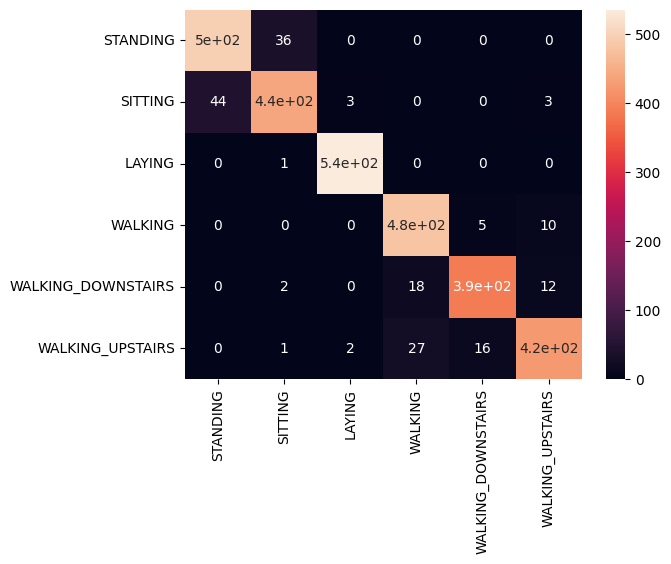

In [253]:
conf_matrix = metrics.confusion_matrix(y_test_, y_test_pred)

sns.heatmap(conf_matrix, annot = True, xticklabels = class_map.values(), yticklabels = class_map.values())
plt.show()

In [254]:
model_accuracy_dict.append({"Model": "CNN", "Accuracy": accuracy })

**CNN+LSTM**

In [255]:
# CNN + LSTM Model
model_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)),  # CNN layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Conv1D(filters=128, kernel_size=3, activation='relu'),  # CNN layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    LSTM(100, return_sequences=False),  # LSTM layer to capture sequential dependencies
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.2),  # Dropout layer
    Dense(len(np.unique(y_train_)), activation='softmax')  # Output layer with softmax activation
])

# Compile model
model_cnn_lstm.compile(optimizer=Adam(learning_rate=0.001),
                       loss=SparseCategoricalCrossentropy(),
                       metrics=['accuracy'])

# Model Summary
model_cnn_lstm.summary()

# Train the CNN + LSTM Model
history = model_cnn_lstm.fit(
    X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val)
)

# Evaluate on validation data
val_loss, val_acc = model_cnn_lstm.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 47, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,134 (539.59 KB)

 Trainable params: 138,134 (539.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.3006 - loss: 1.5642 - val_accuracy: 0.6118 - val_loss: 0.8156
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6217 - loss: 0.8111 - val_accuracy: 0.7158 - val_loss: 0.5847
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7364 - loss: 0.5882 - val_accuracy: 0.8076 - val_loss: 0.4760
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8145 - loss: 0.4578 - val_accuracy: 0.8674 - val_loss: 0.3361
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8585 - loss: 0.3675 - val_accuracy: 0.8579 - val_loss: 0.3163
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.8800 - loss: 0.2925 - val_accuracy: 0.8824 - val_loss: 0.3008
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9046 - loss: 0.2456 - val_accuracy: 0.9014 - val_loss: 0.2364
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.8972 - loss: 0.2652 - val_accuracy: 0.90

In [256]:
# Model Evaluation on Test Data
loss, accuracy = model_cnn_lstm.evaluate(X_test_reshaped, y_test_)
print(f"Test Accuracy: {accuracy:.4f}")



93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8719 - loss: 0.3943
Test Accuracy: 0.8850


In [257]:
# Predict on test data
y_test_pred_probs = model_cnn_lstm.predict(X_test_reshaped)
y_test_pred = np.array([np.argmax(probs) for probs in y_test_pred_probs])

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [258]:
clf_report = metrics.classification_report(y_test_, y_test_pred, digits = 4)
print(clf_report)

              precision    recall  f1-score   support

           0     0.8289    0.9474    0.8842       532
           1     0.8962    0.8086    0.8501       491
           2     0.9962    0.9665    0.9811       537
           3     0.8693    0.9254    0.8965       496
           4     0.9797    0.6905    0.8101       420
           5     0.7967    0.9321    0.8591       471

    accuracy                         0.8850      2947
   macro avg     0.8945    0.8784    0.8802      2947
weighted avg     0.8938    0.8850    0.8837      2947



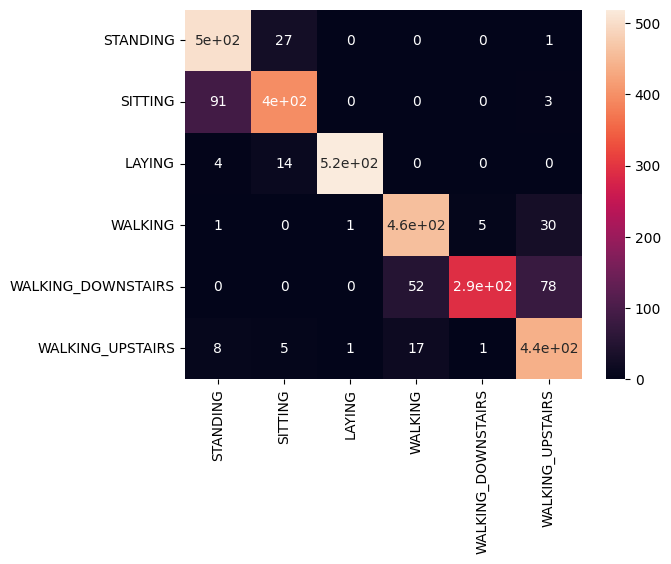

In [259]:
conf_matrix = metrics.confusion_matrix(y_test_, y_test_pred)

sns.heatmap(conf_matrix, annot = True, xticklabels = class_map.values(), yticklabels = class_map.values())
plt.show()

In [260]:
model_accuracy_dict.append({"Model": "CNN+LSTM", "Accuracy": accuracy })

In [261]:
#Model Summary
result_df = pd.DataFrame(model_accuracy_dict)
result_df.head()

,Model,Accuracy
0,Logistic Regression,0.940957
1,Feed forward,0.937564
2,LSTM,0.910453
3,CNN,0.938921
4,CNN+LSTM,0.884968


In [262]:
import pickle

In [263]:
filename = 'Regression_models.pkl'
# Store models in a dictionary
models = {
    'LogisticRegression': log_reg,
    'FeedForward': model,
    'LSTM': model_cnn_lstm,
    'CNN': model_cnn
}

# Save the models to a single pickle file
with open(filename, 'wb') as f:
    pickle.dump(models, f)


In [265]:
# Load the models from the pickle file
with open(filename, 'rb') as f:
    loaded_models = pickle.load(f)

# Use the models
print("Logistic Regression Predictions:", loaded_models['LogisticRegression'].predict(X_test_reg))

ff_pred_probs = loaded_models['FeedForward'].predict(X_test)
feedforward_pred = np.array([np.argmax(probs) for probs in ff_pred_probs])
print("Feed Forward Predictions:", feedforward_pred)

ls_pred_probs = loaded_models['LSTM'].predict(X_test_reshaped)
lstm_pred = np.array([np.argmax(probs) for probs in ls_pred_probs])
print("LSTM Predictions:", lstm_pred)

cnn_pred_probs = loaded_models['CNN'].predict(X_test_reshaped)
cnn_pred = np.array([np.argmax(probs) for probs in cnn_pred_probs])
print("CNN Predictions:", cnn_pred)

Logistic Regression Predictions: ['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step
Feed Forward Predictions: [0 0 0 ... 5 5 5]
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
LSTM Predictions: [0 1 0 ... 5 3 5]
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
CNN Predictions: [0 0 0 ... 5 5 3]
